In [3]:
# importing and reading the dataset 
import pandas as pd
import numpy as np
df=pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# function to compute corelation coefficient between 2 variables
from scipy import stats
def compute_pearson_correlation_coeff(feature1,feature2):
    pearson_coef, p_value = stats.pearsonr(feature1, feature2)
    return pearson_coef
compute_pearson_correlation_coeff(df.petal_width,df.petal_length)

0.9628654314027961

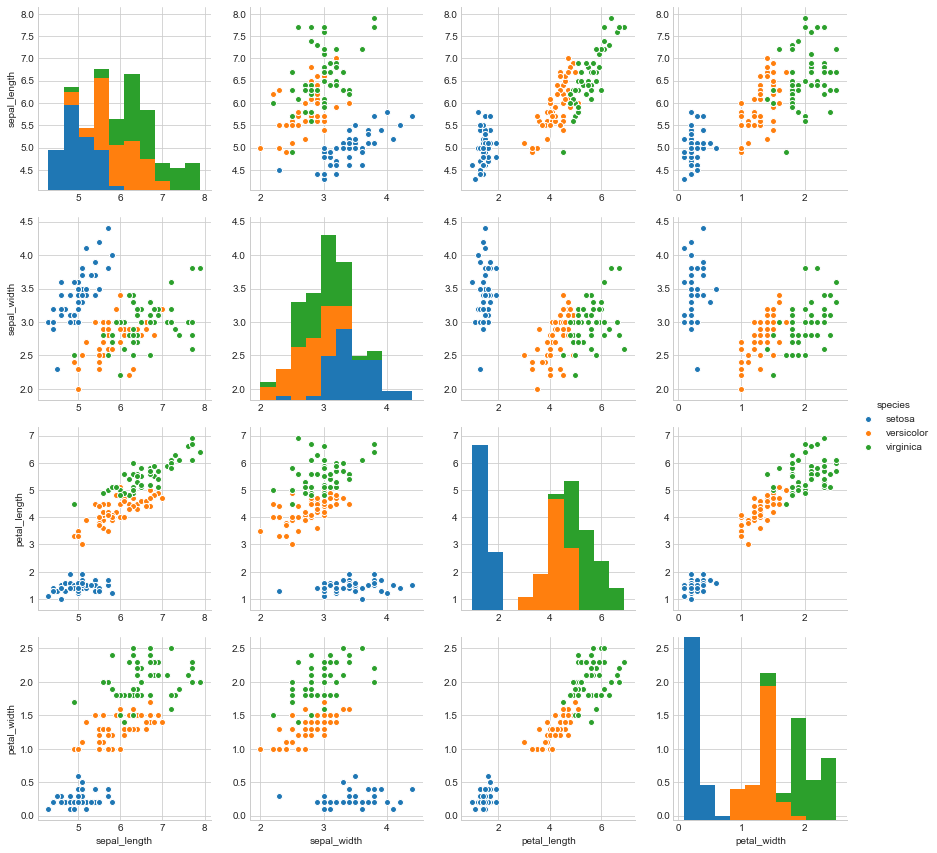

In [19]:
#corelation between 2 features 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(df,hue="species",size=3)
plt.show()

In [6]:
# corelation matrix
corelation_matrix=df.corr()
corelation_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


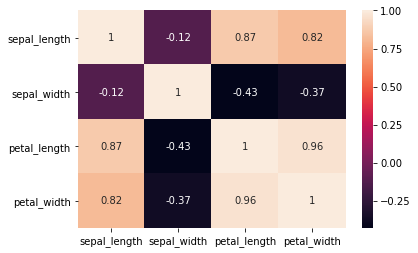

In [7]:
# corelation matrix visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corelation_matrix, annot=True)
plt.show()

In [12]:
# z-score standardization
standardized_data=df.copy()
standardized_data=standardized_data.drop('species',1)
for column in standardized_data:
    standardized_data[column]=(standardized_data[column]-standardized_data[column].mean())/standardized_data[column].std()
# standardized_data['species']=df['species']
standardized_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


In [15]:
# computing covariance matrix of z-score standardized data
covariance_matrix=standardized_data.cov()
covariance_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [18]:
# Computing eigen values and eigen vectors of the covariance matrix
from numpy.linalg import eig
eigen_values,eigen_vectors=eig(covariance_matrix)
idx=eigen_values.argsort()[::-1]   
eigen_values=eigen_values[idx]
eigen_vectors=eigen_vectors[:,idx]
print('Eigen values',eigen_values)
print('Eigen vectors',eigen_vectors)

Eigen values [ 2.91849782  0.91403047  0.14675688  0.02071484]
Eigen vectors [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
